# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></div><div class="lev1 toc-item"><a href="#Version-Control" data-toc-modified-id="Version-Control-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Version Control</a></div><div class="lev1 toc-item"><a href="#Change-Log" data-toc-modified-id="Change-Log-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Change Log</a></div><div class="lev1 toc-item"><a href="#Setup" data-toc-modified-id="Setup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Setup</a></div><div class="lev1 toc-item"><a href="#Convolutional-Neural-Networks" data-toc-modified-id="Convolutional-Neural-Networks-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Convolutional Neural Networks</a></div><div class="lev2 toc-item"><a href="#CS231n-Winter-2016:-Lecture-7:-Convolutional-Neural-Networks-for-Visual-Recognition" data-toc-modified-id="CS231n-Winter-2016:-Lecture-7:-Convolutional-Neural-Networks-for-Visual-Recognition-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>CS231n Winter 2016: Lecture 7: Convolutional Neural Networks for Visual Recognition</a></div><div class="lev1 toc-item"><a href="#Key-Terms" data-toc-modified-id="Key-Terms-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Key Terms</a></div><div class="lev2 toc-item"><a href="#Architecture" data-toc-modified-id="Architecture-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Architecture</a></div><div class="lev2 toc-item"><a href="#Hubel-and-Wesiel" data-toc-modified-id="Hubel-and-Wesiel-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Hubel and Wesiel</a></div><div class="lev2 toc-item"><a href="#Additional-Reading" data-toc-modified-id="Additional-Reading-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Additional Reading</a></div><div class="lev2 toc-item"><a href="#Addional-Videos" data-toc-modified-id="Addional-Videos-64"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Addional Videos</a></div><div class="lev3 toc-item"><a href="#CS231n-Winter-2016:-Lecture-6:-Neural-Networks-Part-3-/-Intro-to-ConvNets" data-toc-modified-id="CS231n-Winter-2016:-Lecture-6:-Neural-Networks-Part-3-/-Intro-to-ConvNets-641"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>CS231n Winter 2016: Lecture 6: Neural Networks Part 3 / Intro to ConvNets</a></div><div class="lev2 toc-item"><a href="#Other-resources" data-toc-modified-id="Other-resources-65"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Other resources</a></div><div class="lev3 toc-item"><a href="#CIFAR-10-ConvNet-Demo---very-good!" data-toc-modified-id="CIFAR-10-ConvNet-Demo---very-good!-651"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>CIFAR-10 ConvNet Demo - very good!</a></div>

# Summary

Notes taken to help for the second project, image recognition, for the [Deep Learning Foundations Nanodegree](https://www.udacity.com/course/deep-learning-nanodegree-foundation--nd101) course delivered by Udacity. 

My Github repo for this project can be found here: [adriantorrie/udacity_dlfnd_project_2](https://github.com/adriantorrie/udacity_dlfnd_project_1)

# Version Control

In [17]:
%run ../../../code/version_check.py

Python: 3.5.3 |Continuum Analytics, Inc.| (default, Feb 22 2017, 21:13:27) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

matplotlib:	2.0.0
numpy:		1.12.0
pandas:		0.19.2
quandl:		3.0.1
sklearn:	0.18.1
scipy:		0.18.1
statsmodels:	0.8.0
tensorflow:	1.0.1


# Change Log

    Date Created: 2017-03-24
    
    Date of Change    Change Notes
    --------------    ----------------------------------------------------------------
    2017-03-24       Initial draft

# Setup

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from IPython.display import YouTubeVideo

plt.style.use('bmh')
matplotlib.rcParams['figure.figsize'] = (15, 4)

[[Top]](#Table-of-Contents)

# Convolutional Neural Networks

## CS231n Winter 2016: Lecture 7: Convolutional Neural Networks for Visual Recognition
 * Andrej Karpathy
 * Published 27 Jan 2016
 * Reddit /r/cs231n
 * Standard YouTube Licence
 
[Supporting notes](https://cs231n.github.io/convolutional-networks/#overview)

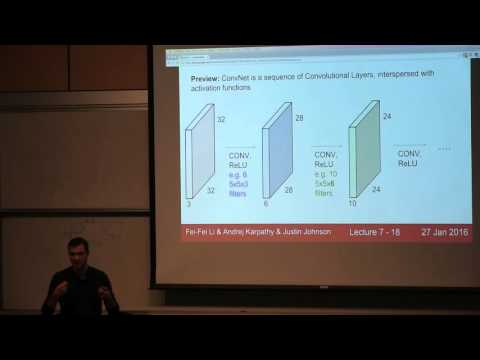

In [16]:
YouTubeVideo("LxfUGhug-iQ", height=365, width=650)

 # Key Terms

 * Filter = Kernel => The filter "slides" over the input image
 * Slide = Number of pixels the filter moves
 * Padding = The padding around the image to allow the filter output to be the same dimensions as the input

[[Top]](#Table-of-Contents)

## Architecture

The general architecture of a covnet is seen below. It has been influenced by the Hubel and Weseil studies (below).

<img src="https://cs231n.github.io/assets/cnn/cnn.jpeg",width=450,height=200>

 ## Hubel and Wesiel
 Hubel and Wesiel did studies in 1959, 1962, 1968, using cats to determine how the visual cortex worked.
 
 * <span style="color:red">Input</span>
 * <span style="color:blue">1st filter bank with multiple activation maps</span>
 * 2nd Dotted layer</span> is another filter bank
 * <span style="color:gray">3rd filter bank with multiple activation maps</span>
 
All layers are 3-dimensional, with the 3 filter layers above progressing from (left to right) fine detail to large object recognition, the image below shows the same feature hierarchy for object recognition, oriented from bottom to top.
 * 1st <span style="color:blue">blue</span> layer is the simple cell / <span style="background-color: #e6e6e6">low level layer</span> in the image below
 * 2nd Dotted layer is the complex cell / <span style="background-color: #e6e6e6">mid level layer</span> in the image below
 * 3rd <span style="color:gray">gray</span> layer is the hyper-complex cell / <span style="background-color: #e6e6e6">high level layer</span> in the image below
 
 <img src="http://cns-alumni.bu.edu/~slehar/webstuff/pcave/hubel.jpg" />

Directly quoted from [here](https://cs231n.github.io/convolutional-networks/#conv)

> **To summarize, the Conv Layer:**
>    
> * Accepts a volume of size $W_1 \times H_1 \times D_1$
> * Requires four hyperparameters:
>  * the number of filters $K$
>  * their spatial extent $F$
>  * the stride $S$
>  * the amount of zero padding $P$
> * Produces a volume of size $W_2 \times H_2 \times D_2$ where:
>  * $W_2 = (W_1 − F + 2_P) / S + 1$
>  * $H_2 = (H_1 − F + 2_P) / S + 1$ (i.e. width and height are computed equally by symmetry)
>  * $D_2 = K$
> * With parameter sharing, it introduces:
>  * $F \times F \times D_1$ weights per filter
>  * for a total of $F \times F \times D_1 \times K$ weights
>  * and $K$ biases
> * In the output volume, the $d$-th depth slice (of size $W_2 \times H_2$) is the result of performing:
>  * a valid convolution of the $d$-th filter over the input volume
>  * with a stride of $S$, and then 
>  * offset by $d$-th bias
> * A common setting of the hyperparameters is:
>  * $F = 3$
>  * $S = 1$
>  * $P = 1$
>
> However, there are common conventions and rules of thumb that motivate these hyperparameters. See the [ConvNet architectures section](https://cs231n.github.io/convolutional-networks/#architectures) ...

[[Top]](#Table-of-Contents)

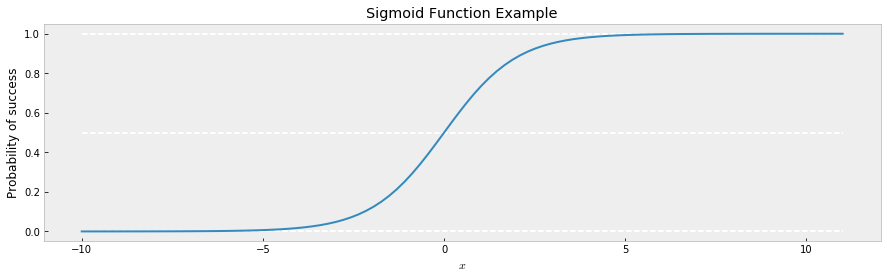

In [5]:
x = np.linspace(start=-10, stop=11, num=100)
y = sigmoid(x)

upper_bound = np.repeat([1.0,], len(x))
success_threshold = np.repeat([0.5,], len(x))
lower_bound = np.repeat([0.0,], len(x))

plt.plot(
    # upper bound
    x, upper_bound, 'w--',
    
    # success threshold
    x, success_threshold, 'w--',
    
    # lower bound
    x, lower_bound, 'w--',
    
    # sigmoid
    x, y
)

plt.grid(False)
plt.xlabel(r'$x$')
plt.ylabel(r'Probability of success')
plt.title('Sigmoid Function Example')
plt.show()

[[Top]](#Table-of-Contents)

## Additional Reading

 * [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/)
 * [Deep Learning Book - Chapter 9: Convolutional Networks](http://www.deeplearningbook.org/contents/convnets.html)
 

[[Top]](#Table-of-Contents)

## Addional Videos

### CS231n Winter 2016: Lecture 6: Neural Networks Part 3 / Intro to ConvNets
 * Andrej Karpathy
 * Published 27 Jan 2016
 * Reddit /r/cs231n
 * Standard YouTube Licence

In [19]:
YouTubeVideo("v=hd_KFJ5ktUc", height=365, width=650)

[[Top]](#Table-of-Contents)

In [20]:
YouTubeVideo("v=u6aEYuemt0M", height=365, width=650)

[[Top]](#Table-of-Contents)

## Other resources

### CIFAR-10 ConvNet Demo - very good!
[CIFAR-10 ConvNet Demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html) 

[[Top]](#Table-of-Contents)